In [68]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Limits of diversification

Benefits of diversification:
1. Eliminating unrewarded idiosyncratic risks

Limits of diversification:
1. Diversification will fail you when you need it the most.
2. Almost by definition one cannot diversify away systematic risk.

Diversification versus Hedging
Advantage: Hedging is the only effective way to obtain downside protection
Disadvantage: The problem with Hedging is that inverstors give up on the upside at the same time as they give up on the downside

The main benefit of diversification is to deliver the highest reward per unit of risk across market conditions.  

Diversification allows investors to reduce specific risk within their portfolios, which is how they can achieve a high reward per unit of risk.  

Hedging versus Insurance

Benefits of Insurance:
1. Get downside protection while allowing for upside potential.

Insurance is Dynamic Hedging.
It is like an brake when driving a car when the road it not stright.


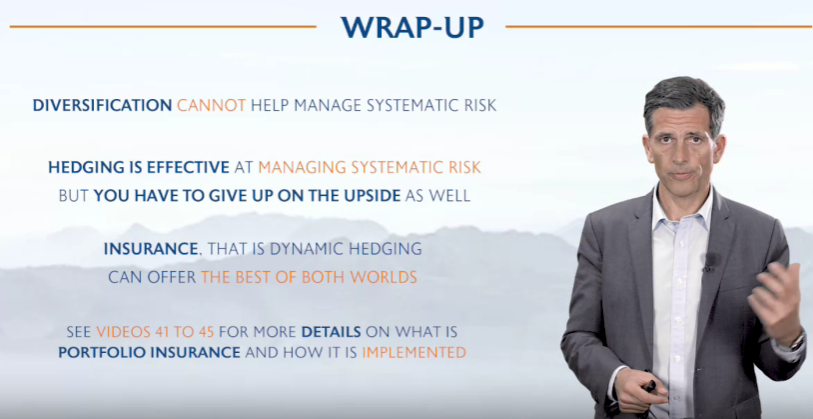

# Lab session- Limits of Diversification-Part1

In [69]:
ind_return=erk.get_ind_returns()
ind_nfirms=erk.get_ind_nfirms()
ind_size=erk.get_ind_size()

In [70]:
ind_return.shape

(1110, 30)

In [71]:
ind_nfirms.shape

(1110, 30)

In [72]:
ind_size.shape
#To check load file properly

(1110, 30)

In [73]:
ind_nfirms.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-08,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-09,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-10,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-11,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4


In [74]:
#compute capital marketlization
ind_mktcap=ind_nfirms*ind_size
ind_mktcap.shape

(1110, 30)

In [75]:
total_mktcap=ind_mktcap.sum(axis='columns')

<Axes: >

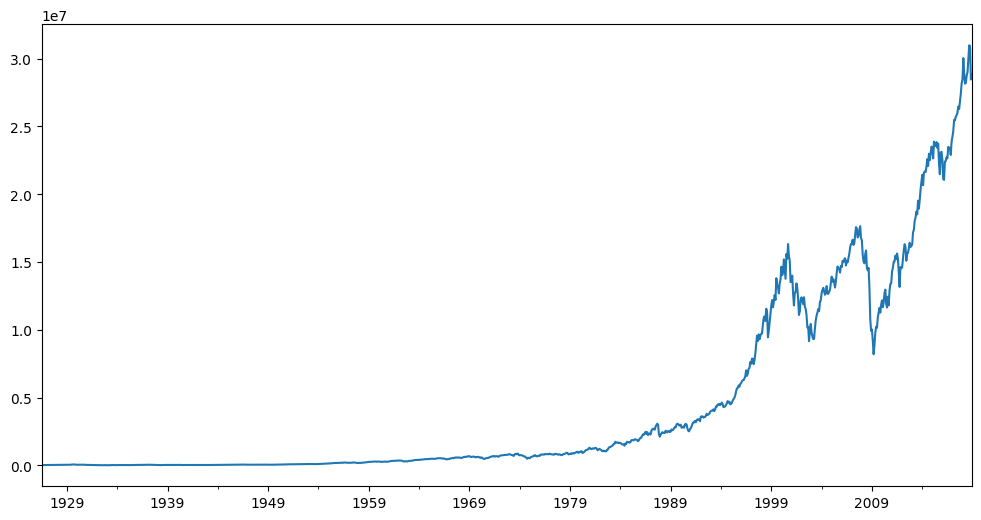

In [77]:
total_mktcap.plot(figsize=(12,6))
# When the crashes happen, the capitalization will lose a lot.

In [78]:
#Capitalization weight
ind_capweight=ind_mktcap.divide(total_mktcap, axis='rows')
#for every rows

In [83]:
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


In [86]:
ind_capweight['1926':'1926'].sum(axis='columns')

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

<Axes: >

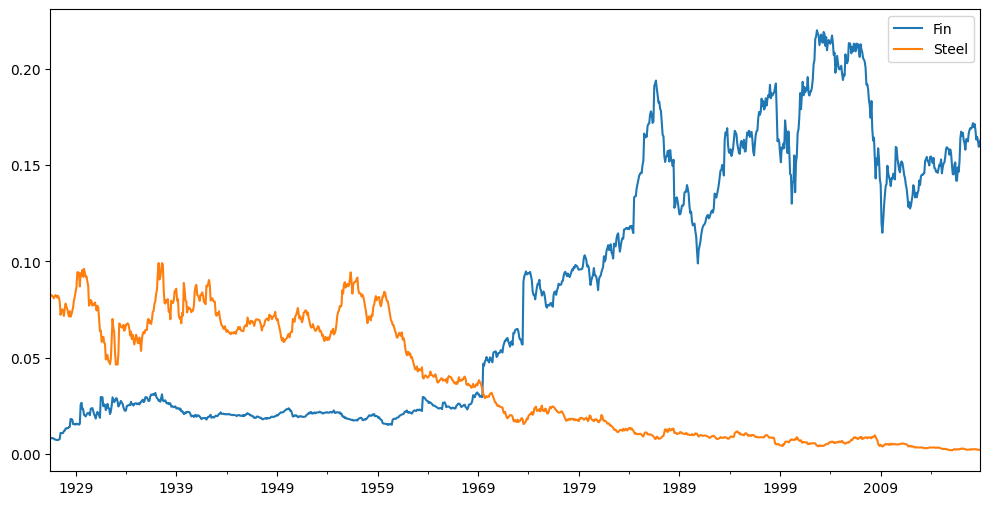

In [88]:
ind_capweight[['Fin','Steel']].plot(figsize=(12,6))
# Industry capweight trend

In [91]:
total_market_return=(ind_capweight*ind_return).sum(axis='columns')

<Axes: >

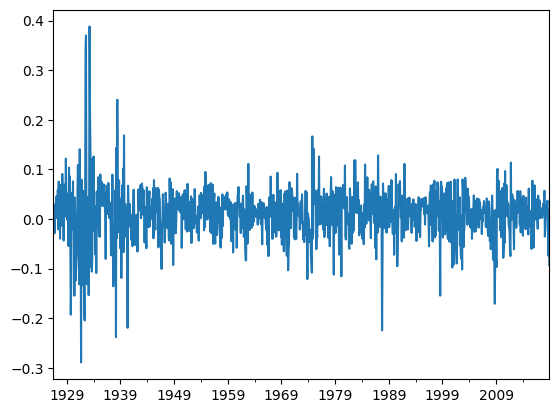

In [92]:
total_market_return.plot()

<Axes: title={'center': 'Total Market CapWeight Index 1926-2018'}>

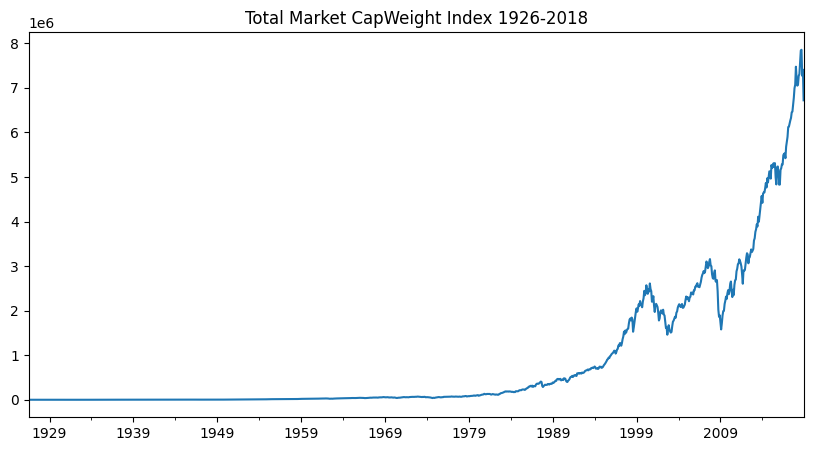

In [93]:
total_market_index=erk.drawdown(total_market_return).Wealth
total_market_index.plot(figsize=(10,5), title='Total Market CapWeight Index 1926-2018')

<Axes: >

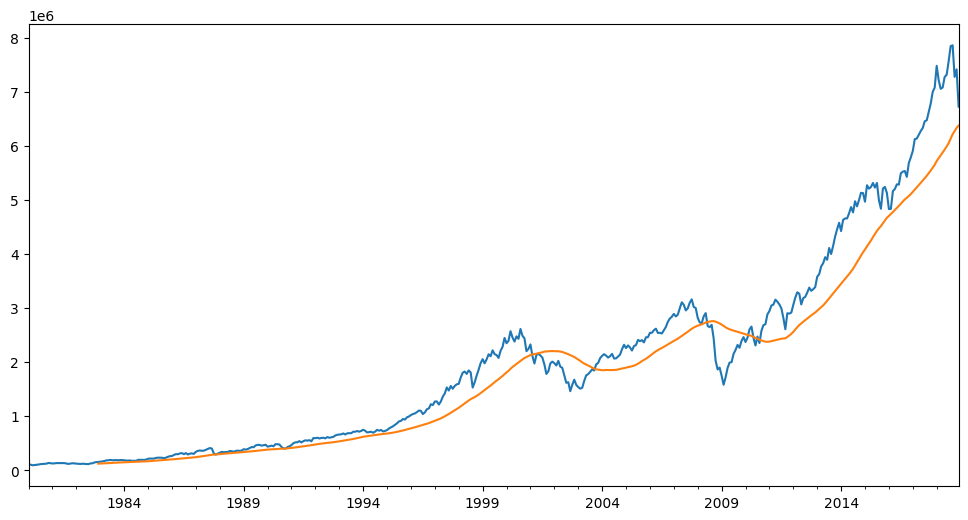

In [96]:
total_market_index['1980':].plot(figsize=(12,6))
total_market_index['1980':].rolling(window=36).mean().plot(figsize=(12,6))
# it gives 36 month windows, which means 3 years (indicated in the orange line)